In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')


Versión de pandas: 2.3.1
Versión de numpy: 2.3.1
Versión de scikit-learn (sklearn): 1.7.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [2]:
datos = pd.read_csv('./data/flights.csv')
datos.shape

(71175, 11)

In [3]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


## **Finalidad del método Describe**

La Estadística Descriptiva es una rama de la Estadística que utiliza varias técnicas para describir y resumir un conjunto de datos. Es extremadamente útil en el análisis inicial de datos, proporcionando un resumen rápido y eficiente para los(as) investigadores(as). Uno de los métodos más utilizados en la estadística descriptiva es el describe().

En este sentido: ¿cuál es la finalidad principal del método describe en Pandas y qué estadísticas genera?

- Calcula estadísticas resumidas de los datos en un DataFrame, incluyendo: conteo, media, desviación estándar, mínimo, cuartiles y máximo.

    -   El método describe es una herramienta poderosa que proporciona estadísticas descriptivas de un conjunto de datos. Este método calcula varias estadísticas resumidas a la vez, incluyendo el conteo (número de elementos), media, desviación estándar (medida de dispersión de los datos), mínimo (el valor más bajo), los cuartiles (25%, 50% y 75% - correspondientes al primer cuartil, mediana y tercer cuartil, respectivamente) y el máximo (el valor más alto). Además, es posible obtener las estadísticas descriptivas para las variables categóricas: df.describe(include=['O']).

In [7]:
import matplotlib.pyplot as plt

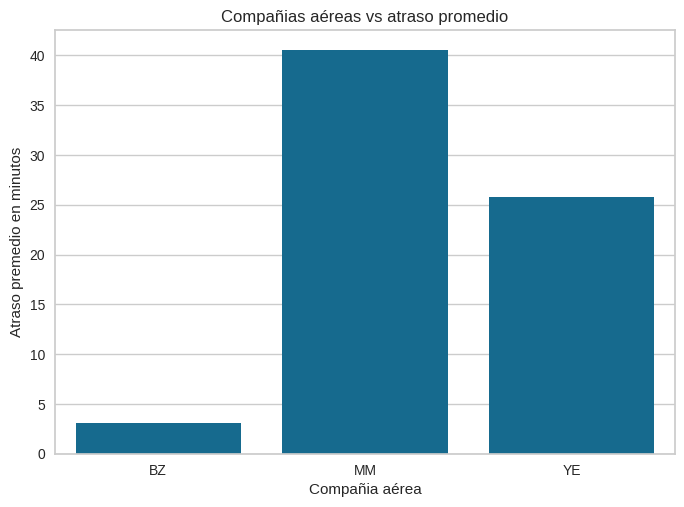

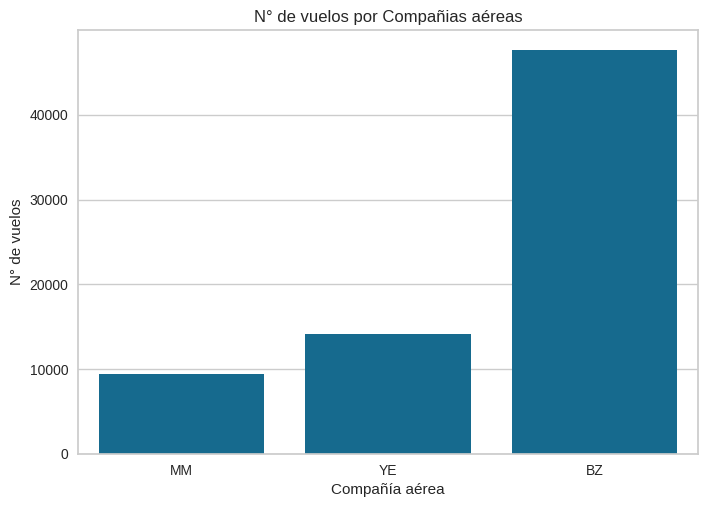

In [8]:
# veremos el promedio de retrasos en lso vuelos
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

#graficamos
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aéreas vs atraso promedio')
plt.xlabel('Compañia aérea')
plt.ylabel('Atraso premedio en minutos')
plt.show()


sns.countplot(data=datos, x='airline')
plt.title('N° de vuelos por Compañias aéreas')
plt.xlabel('Compañía aérea')
plt.ylabel('N° de vuelos')
plt.show()


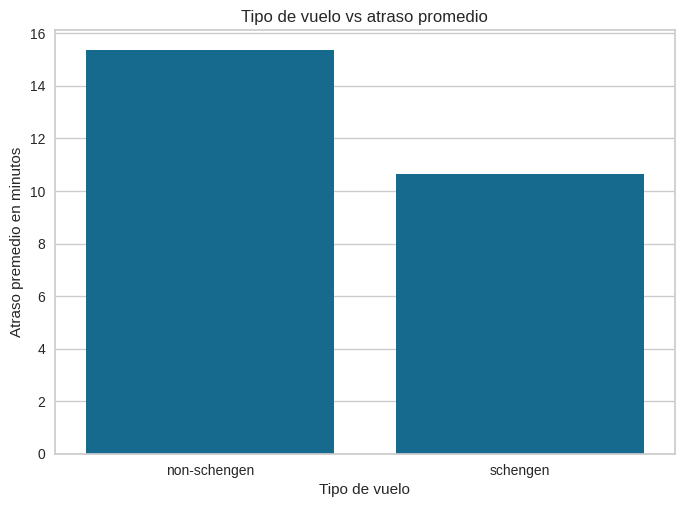

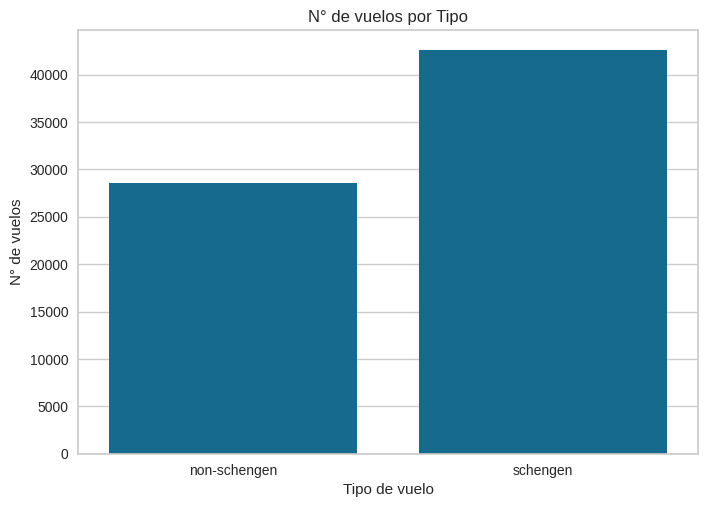

In [9]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

#graficamos
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso premedio en minutos')
plt.show()


sns.countplot(data=datos, x='schengen')
plt.title('N° de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('N° de vuelos')
plt.show()

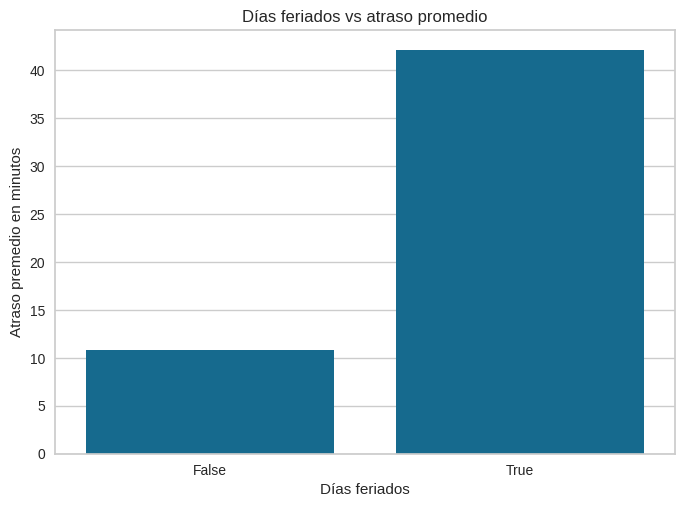

In [10]:
# revisaremos si es feriado o  no 

avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

#graficamos
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso premedio en minutos')
plt.show()

#

In [11]:
datos['aircraft_type'].value_counts().index
#'Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175','Boeing 737', 'Boeing 777'],

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

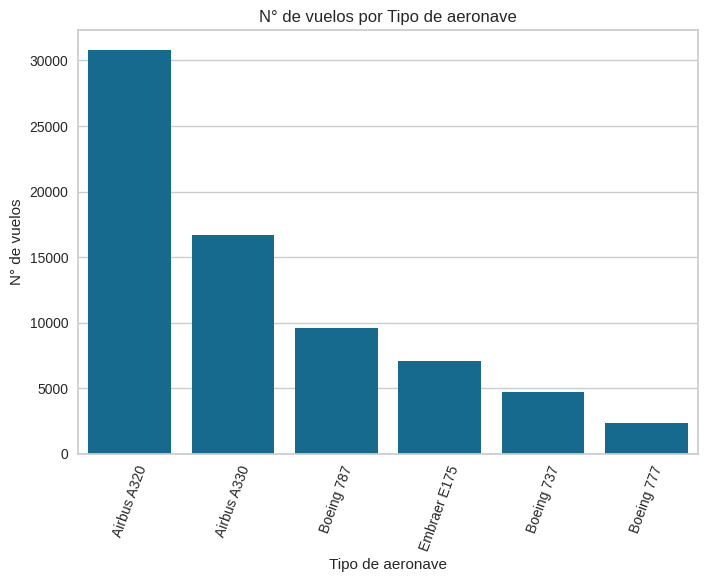

In [12]:
# revisaremos la cantidfad de aviones y tipos que pasan por el aeropuerto

order = datos['aircraft_type'].value_counts().index


sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('N° de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('N° de vuelos')
plt.show()

## **Para saber más: el Espacio Schengen**

El Espacio Schengen es un área geográfica que abarca la mayoría de los países europeos, donde se han eliminado los controles fronterizos para permitir la libre circulación de personas entre los países miembros. Esta área recibe su nombre en referencia al Acuerdo de Schengen, firmado en 1985 en la aldea de Schengen, en Luxemburgo, e implementado en 1995.

El acuerdo fue nombrado así por el lugar de la firma, pero el tratado Schengen en sí fue un desarrollo del Acuerdo de Schengen de 1990.

![img schengen](./data/Schengen.png)


Fuente: Mapa del Espacio Schengen en 2017.

Los países que forman parte del Espacio Schengen han abolido los controles fronterizos en las fronteras internas, lo que significa que no es necesario presentar un pasaporte o pasar por verificaciones de inmigración al viajar entre estos países. En las fronteras externas, sin embargo, es más riguroso y común, para garantizar la seguridad y el control de la inmigración.

Actualmente, la mayoría de los países de la Unión Europea (UE) forman parte del Espacio Schengen, junto con Noruega, Islandia, Suiza y Liechtenstein, que no son miembros de la UE. Sin embargo, es importante notar que no todos los países de la UE han adherido al Acuerdo de Schengen.

La libre circulación dentro del Espacio Schengen facilita los viajes y el comercio entre los países miembros, convirtiéndolo en una parte fundamental de la integración europea y un ejemplo de cooperación transfronteriza en cuestiones de seguridad e inmigración.


<Axes: xlabel='arrival_time', ylabel='Count'>

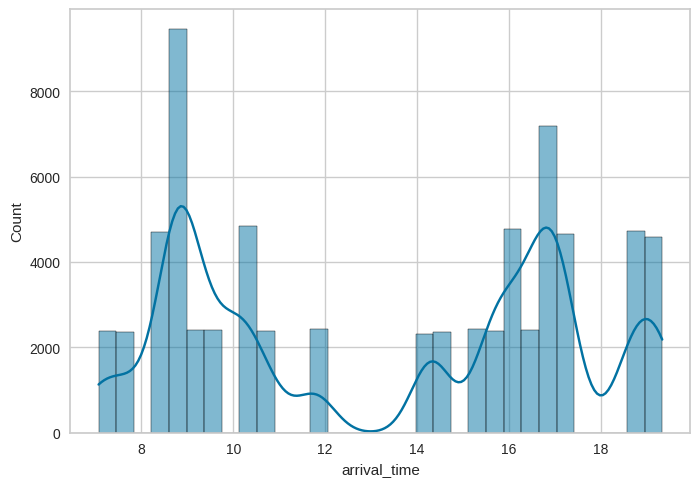

In [13]:
# Analisaremos lña feecuencia de los valores usando histograma (hoprario llegada, salida y atrasos en minutos)

sns.histplot(data=datos, x='arrival_time', kde=True)

[Fuente en Wikiopedia](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) 

In [14]:
# Formula de freeman & Diaconis

def ancho_bin(df, columna):
    q75,q25 = np.percentile(df[columna], [75,25])
    iqr = q75-q25
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

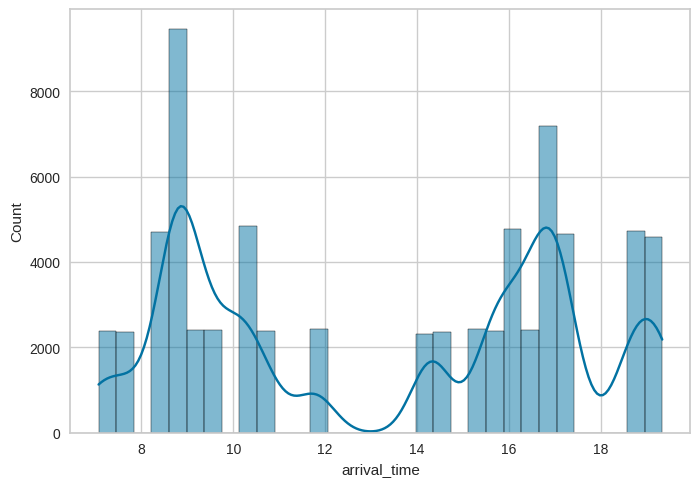

In [15]:
# Horario de llegada

binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

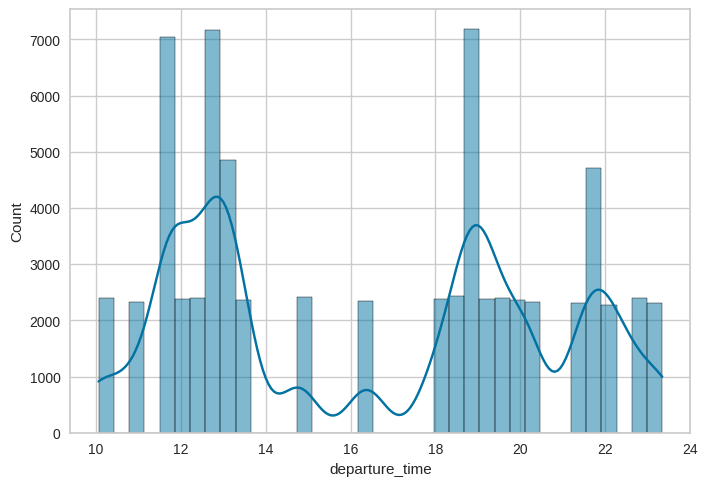

In [16]:
# horario de salida
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth)

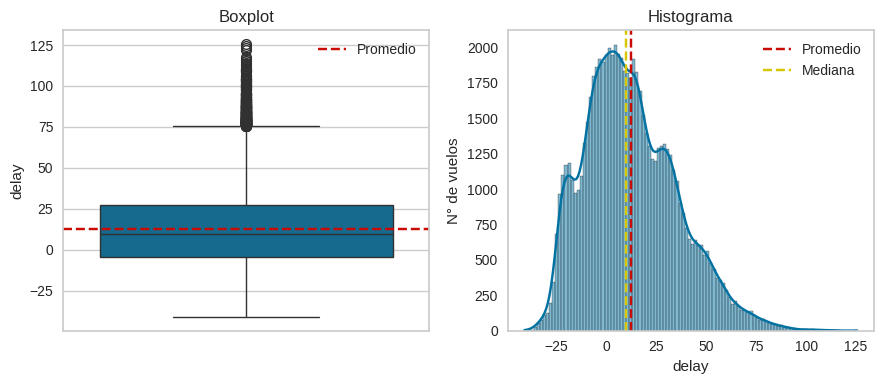

In [17]:
# Retraso promedio
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('N° de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

## **Objetivo del boxplot**

El boxplot, también conocido como diagrama de caja, es una representación gráfica que nos permite visualizar la distribución de los datos de una forma más clara y objetiva. Está compuesto por: un rectángulo que representa la medianas y los cuartiles de los datos, además de líneas que se extienden hacia fuera del rectángulo, que muestran el rango de los datos, conforme a la imagen a continuación:

![img bloxplot](./data/boxsplot.png)

Donde:

- El límite inferior es el valor mínimo que un dato puede tener sin ser considerado un valor atípico (outlier). Se calcula como Q1 - 1,5 x IQR (donde IQR es el rango intercuartílico, es decir, la diferencia entre el tercer cuartil y el primer cuartil).
- El primer cuartil (Q1) es el valor que divide los datos en 25% por debajo y 75% por encima de él. Es decir, el 25% de los datos están por debajo del Q1 y el 75% están por encima.
- La mediana es el valor que divide los datos en 50% por debajo y 50% por encima de él.
- El tercer cuartil (Q3) es el valor que divide los datos en 75% por debajo y 25% por encima de él. Es decir, el 75% de los datos están por debajo del Q3 y el 25% están por encima.
- El límite superior es el valor máximo que un dato puede tener sin ser considerado un valor atípico. Se calcula como Q3 + 1,5 x IQR.

Ante esto, podemos decir que la finalidad del boxplot es:


- Visualizar la distribución de los datos e identificar posibles candidatos a outliers.

    - El boxplot se utiliza para visualizar la distribución de los datos e identificar posibles outliers. Muestra los cuartiles (Q1, Q2 y Q3), la mediana (Q2), además de indicar la presencia de valores extremos o discrepantes.

## **Clase 2**

datos

In [18]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [19]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [20]:
# crearemos una columna que nos permita determinar si es fin de semana o no 

datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
61453,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,81,2021,False,-7.761594,2021-03-23,False,Tuesday
4612,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,307,2010,False,25.195194,2010-11-04,False,Thursday
56041,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,86,2020,False,-3.212542,2020-03-27,False,Friday
50188,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,60,2019,False,13.071718,2019-03-02,True,Saturday
61107,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,58,2021,False,-18.541361,2021-02-28,True,Sunday


## **Para saber más: ¿qué es el feature engineering?**

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**

Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering:**

1. Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.

2. Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.

**Técnicas de Feature Engineering:**

Existen varias técnicas de feature engineering, incluyendo:

1. Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

2. Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.

3. Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

## **Feature engineering y su importancia**

En el área de ciencia de datos y aprendizaje automático, un concepto fundamental es la "Feature engineering" (Feature Engineering). Esta técnica desempeña un papel crucial en el desarrollo de modelos predictivos y analíticos, permitiendo que los científicos de datos extraigan información valiosa de los datos. En este sentido, ¿qué es la Feature engineering y por qué es importante?


La Feature engineering implica la creación, transformación y selección de variables a partir de datos en bruto.

La Feature engineering es un proceso que implica la creación, transformación y selección de variables a partir de datos en bruto. El objetivo es mejorar la precisión del modelo, proporcionando información más significativa y relevante.

In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
## 

datos['schengen'] = datos['schengen'].replace({'non-schengen':0, 'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0, True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
50934,21,BZ,Boeing 737,1,FJB,7.065594,10.065594,110,2019,0,9.592983,2019-04-21,1,Sunday
57234,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,165,2020,0,-13.537013,2020-06-14,1,Sunday
44077,29,BZ,Boeing 737,1,ZQO,8.591208,11.591208,18,2018,0,-4.717711,2018-01-19,0,Friday


In [24]:
categoricas= ['airline', 'aircraft_type', 'origin', 'day_name']
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
57218,23,1,18.801235,21.801235,164,2020,0,18.584215,2020-06-13,1,...,1,0,0,0,0,1,0,0,0,0
47274,20,1,16.909690,18.909690,231,2018,0,25.003108,2018-08-20,0,...,0,0,0,0,1,0,0,0,0,0
1487,22,0,8.794147,11.794147,99,2010,0,25.459206,2010-04-10,1,...,0,0,0,0,0,1,0,0,0,0
45430,9,0,10.733469,12.733469,108,2018,0,-18.096443,2018-04-19,0,...,0,1,0,0,0,0,0,1,0,0
47085,6,1,17.033688,19.033688,219,2018,0,20.648890,2018-08-08,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# crearemos  un mapa de correlacion

datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [27]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [28]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'date'])
df.sample(10)


,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
4489,1,17.033688,0,33.517035,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
51932,0,8.885071,1,63.357549,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
48029,1,14.376052,0,-2.434743,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
55652,1,8.591208,0,2.267862,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
53315,0,16.718722,0,0.638574,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4090,0,17.041281,0,85.436730,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53306,1,14.258911,0,-3.467309,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
35075,0,19.341235,0,17.163129,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36211,0,10.172731,0,6.754906,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
54968,1,16.245220,0,51.499444,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


## **ejercicio**

### **Manos a la obra: ¿cómo utilizar el OneHotEncoder de Sklearn?**

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

```python
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
df_encoded.head()
```
¡Ahora es el momento de poner en práctica otro enfoque!

Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.



## **Clase 3**

https://scikit-learn.org/stable/

In [29]:
# crearemos un modelo baseline dummy

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

#datos de pruebas

X = df.drop(['delay'], axis=1) # variables independientes
y = df['delay'] # variable de respuesta

# datos de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# creamos y entrenamos el modelo baseline

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

,strategy,'mean'
,constant,None
,quantile,None


In [30]:
# Evaluaremos nuestro modelo con metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# variables de prediccion
y_pred_dummy = baseline.predict(X_test)

# funcion para calcular la regresion
def calcular_regresion(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'RMSE': round(rmse**(1/2),4),
        'MAE': round(mae,4),
        'R2' : round(r2,4)
    }
    return metricas

In [31]:
# generamos un var resultados

resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

## **Para saber más: métricas utilizadas en regresión**


Durante el video, se presentaron algunas de las métricas más comunes para evaluar modelos de regresión, como RMSE, MAE y R2. Junto con estas métricas, existen diversas otras que pueden ser bastante útiles durante la evaluación de un modelo de regresión. A continuación, podrás encontrar algunas de las métricas más utilizadas y sus traducciones en español:

- Mean squared error - MSE (Error Cuadrático Medio);
- Mean absolute error - MAE (Error Absoluto Medio);
- Root Mean Squared Error - RMSE (Raíz Cuadrada del Error Cuadrático Medio);
- Mean Squared Logarithmic Error - MSLE (Error Logarítmico Cuadrático Medio); y
- Mean Absolute Percentage Error - MAPE (Porcentaje del Error Absoluto Medio).

**Mean squared error - MSE**

El Mean Squared Error (MSE), o Error Cuadrático Medio, es una métrica ampliamente utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Esta métrica calcula la media de los errores cuadrados, donde cada error es la diferencia entre el valor previsto por el modelo y el valor real. La elevación al cuadrado da mayor peso a los errores mayores, lo que puede ser útil cuando esos errores son particularmente indeseables. El MSE se define matemáticamente como:

![imd MSE](./data/meansquarederror.png)

En esta fórmula, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSE se calcula tomando la diferencia entre los valores reales y los valores predichos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

Para evaluar la calidad de un modelo usando el MSE, cuanto más cerca de 0 esté el valor del MSE, mejor estará el modelo en predecir los valores deseados. Esto se debe a que un MSE de 0 indica que no hay diferencia entre los valores previstos y los valores reales, es decir, el modelo está haciendo predicciones perfectas.

Aunque el MSE es una métrica útil, vale la pena mencionar que tiene la desventaja de dar más peso a los outliers debido al cuadrado de cada término. Esto puede ser indeseable en muchos casos, llevando a los investigadores a usar alternativas, como el error absoluto medio (MAE).

La documentación de scikit-learn tiene información que ofrece más detalles sobre esta métrica en [“mean_squared_error”](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).


**Mean absolute error - MAE**

El Error Absoluto Medio (MAE) es una medida de error común utilizada en modelos de regresión. Se calcula tomando la media de los valores absolutos de los errores. En otras palabras, para cada punto de datos, primero calculamos el error (la diferencia entre el valor predicho y el valor real), tomamos el valor absoluto de ese error (para asegurar que todos los errores sean positivos), y luego calculamos la media de todos estos errores absolutos. El MAE se define como:

![img MAE](./data/MAE.png)

En esta ecuación, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MAE se calcula tomando la diferencia absoluta entre los valores reales y los valores predichos para todas las observaciones, sumando estas diferencias absolutas y, a continuación, dividiendo por el número de observaciones "n".

El MAE es similar a la Métrica del Error Cuadrático Medio (MSE), pero en lugar de elevar los errores al cuadrado, simplemente toma el valor absoluto de los errores. Esto hace que el MAE sea menos sensible a outliers que el MSE, ya que los errores grandes no se amplifican por el cuadrado.

Al evaluar modelos de regresión con el MAE, un valor menor indica un modelo más preciso. En otras palabras, cuanto menor sea el MAE, mejor será el modelo en predecir el valor correcto para nuevos datos. El MAE tiene un límite inferior de 0, que indica un modelo perfecto (es decir, todas las predicciones son exactas).

Cabe destacar que, aunque el MAE es una métrica útil, no debe ser la única métrica utilizada para evaluar el rendimiento de un modelo de regresión. Otras métricas, como el MSE, la Raíz Cuadrada del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2), también deben ser consideradas para obtener una evaluación completa de la capacidad de un modelo para hacer predicciones precisas.

La documentación de scikit-learn ofrece más detalles sobre esta métrica en [“MAE”](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).

**Root Mean Squared Error - RMSE**

La Raíz Cuadrada del Error Cuadrático Medio (RMSE) es una métrica de evaluación comúnmente utilizada en modelos de regresión, que es esencialmente la raíz cuadrada del MSE (Error Cuadrático Medio). El RMSE se calcula tomando la raíz cuadrada de la media de los errores cuadrados, que son las diferencias entre los valores previstos y los valores reales, elevadas al cuadrado. Matemáticamente, el RMSE se define como:

![img MRSE](./data/RMSE.png)


Donde:

- n es el número de muestras;
- Ŷ_j es la predicción del modelo para la muestra j;
- Y_j es el valor real para la muestra j.

El RMSE es una medida de la dispersión de los residuos (errores de predicción) y, al igual que el MSE, penaliza los errores mayores de forma más severa que los errores menores, debido al hecho de elevar al cuadrado las diferencias. Esto lo hace particularmente sensible a grandes errores.

Un valor menor de RMSE indica un mejor ajuste del modelo a los datos, es decir, las predicciones del modelo están más cerca de los valores reales. Es importante resaltar que, aunque el RMSE es una métrica útil, no debe ser la única métrica considerada al evaluar la calidad de un modelo de regresión.

Puedes acceder a la documentación de scikit-learn para saber más sobre esta métrica: [metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

**Mean Squared Logarithmic Error - MSLE**

El Error Logarítmico Cuadrático Medio es una métrica de evaluación utilizada en problemas de predicción donde la escala de los valores objetivo o de las predicciones varía significativamente y los errores relativos son más importantes que los errores absolutos. El MSLE mide el error cuadrático medio entre los logaritmos naturales de los valores reales y los logaritmos naturales de las predicciones. Matemáticamente, se puede definir el MSLE de la siguiente manera:


![img MSLE](./data/MSLE.png)

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSLE se calcula tomando el logaritmo natural de los valores reales y predichos sumados a 1, calculando la diferencia entre estos logaritmos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

El principal punto de enfoque de esta métrica es medir la diferencia relativa entre los valores esperados y los predichos por el modelo, es decir, verifica la diferencia porcentual entre ellos. De modo que, pequeñas diferencias entre valores pequeños son tratadas igualmente a grandes diferencias entre valores grandes, a diferencia de lo que ocurre en el MSE, como se muestra en el siguiente ejemplo:

![img Punto](./data/puntoenfoque.png)

Esto nos muestra que las grandes diferencias entre los valores reales y predichos tienen poca variación en el resultado final de la métrica. Por lo tanto, esta métrica se utiliza más cuando no deseamos que grandes errores sean significativamente más penalizados que errores pequeños.

Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: [metrics.mean_squared_log_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error).

**Mean Absolute Percentage Error - MAPE**

El Mean Absolute Percentage Error es muy similar al Mean Absolute Error - MAE, con la diferencia de que mide la precisión como un porcentaje y puede ser calculado como el porcentaje del MAE para cada muestra. El MAPE se utiliza mucho en problemas de regresión, ya que proporciona una interpretación bastante intuitiva sobre el error relativo. La definición del MAPE es:

![img MAPE](./data/MAPE.png)

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación, "ŷ_i" es el valor predicho para la i-ésima observación, y el MAPE se calcula como la media de los porcentajes absolutos de las diferencias entre los valores reales y los valores predichos en relación con los valores reales. El resultado se multiplica por 100% para expresar el error como un porcentaje.

El MAPE se utiliza frecuentemente como una métrica de error para evaluar la precisión de las predicciones en problemas de predicción y se expresa como un porcentaje del error medio absoluto en relación con los valores reales. Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: [metrics.mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error).



## **Manos a la obra: otras estrategias para el DummyRegressor**



Como se indica en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html), observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Por lo tanto, sugerimos que pruebes las otras estrategias presentes en el parámetro <mark>strategy</mark> [del DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html).



## **Bosques aleatorios**

In [32]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

Utilizaremos la biblioteca [Yellowbrick](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html)

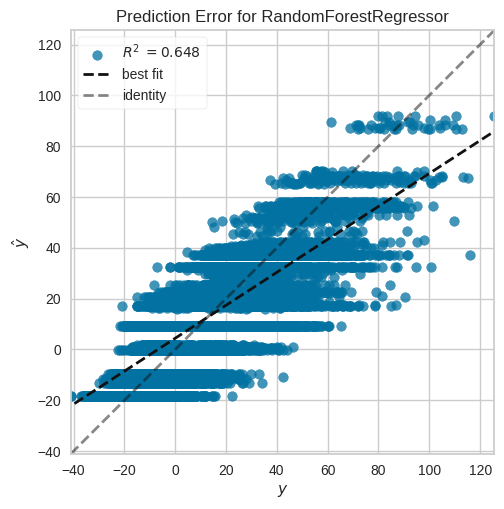

In [33]:
# veremos el resultado de forma visual

from yellowbrick.regressor import prediction_error

# visualizaremos

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test)

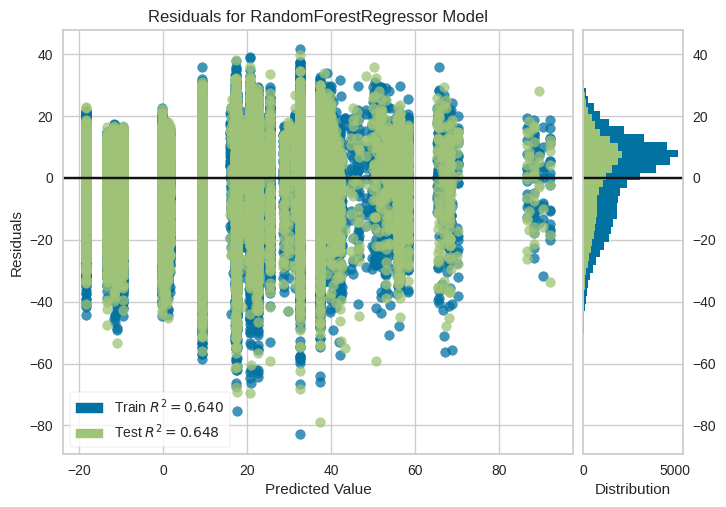

In [34]:
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

## **Overfitting en RandomForestRegressor**

Eres un científico de datos en una empresa de consultoría financiera y se te ha solicitado desarrollar un modelo para predecir el precio de las acciones de una empresa de tecnología basado en varias características financieras y económicas. Decidiste utilizar el modelo de regresión Random Forest para crear esta predicción.

1. El riesgo de overfitting aumenta considerablemente cuando la profundidad máxima (max_depth) de los árboles de decisión se incrementa excesivamente.

    - El aumento excesivo de la profundidad máxima de los árboles de decisión en el modelo RandomForestRegressor puede hacerlo susceptible al overfitting. Por lo tanto, es una buena práctica definir el valor del parámetro max_depth al trabajar con modelos basados en árboles.

2. La combinación de varios árboles de decisión en un ensemble ayuda a reducir el overfitting, haciendo que el modelo sea más robusto frente a este problema.

    - El modelo RandomForestRegressor es robusto frente al overfitting debido a la naturaleza de ensemble de los modelos de árboles de decisión, que reduce el overfitting mediante el promedio de varios árboles de decisión.

## **Kfold**

[Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.htm)

### **Cross-validation**

[Documentacion](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold)

### **model_selection - cross_validate**

[Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)

In [35]:
from sklearn.model_selection import KFold, cross_validate

scoring ={
    'RMSE':'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'R2' : 'r2'
}

cv = KFold(n_splits = 5, shuffle=True, random_state = 42)
cv_result = cross_validate(modelo, X_train, y_train,scoring=scoring, cv=cv)
cv_result

{'fit_time': array([4.18308449, 4.83054805, 4.40959501, 3.51425505, 3.67191648]),
 'score_time': array([0.06580138, 0.06646085, 0.05493355, 0.0644207 , 0.07799053]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

## **Revisando la validación cruzada**

Eres un científico de datos trabajando en un proyecto de predicción de precios de bienes raíces. Has recopilado un conjunto de datos con información sobre varias propiedades, como tamaño, número de habitaciones, ubicación, etc., y deseas entrenar un modelo de regresión para predecir los precios de las propiedades en función de estos atributos.

Para evaluar el rendimiento del modelo de regresión que estás desarrollando, decides usar la validación cruzada.


Es una técnica que divide el conjunto de datos en k partes iguales, entrena el modelo en k-1 partes y evalúa el modelo en la parte restante. Esto se repite k veces, cada vez con una parte diferente siendo utilizada como conjunto de prueba.

- La validación cruzada es una técnica robusta utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Divide el conjunto de datos en 'k' partes iguales, o 'folds', entrena el modelo en 'k-1' de estas partes y prueba el modelo en la parte restante. Este proceso se repite 'k' veces, cada vez con una parte diferente siendo utilizada como conjunto de prueba. Cada una de estas iteraciones se llama 'fold', y el promedio de la medida de rendimiento en todas las 'k' iteraciones proporciona una estimación más confiable del rendimiento del modelo.

## **Clase 4**

In [36]:
df.columns


Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [38]:
importances = modelo.feature_importances_

In [41]:
feature_importances = pd.DataFrame({'Features':X.columns, 'Importances':(importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [42]:
## elavoramos un analisis mas logico y fundamentado
resultados = pd.DataFrame(index =['RMSE','MAE', 'R2'])
model_feature = RandomForestRegressor(max_depth=5, random_state=42)
ct_feature = [ i if i != 0 else 1 for i in range(0, 35, 5)]

for i in ct_feature:
    selected_features = feature_importances['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_feature.fit(X_train_sel, y_train)
    y_pred = model_feature.predict(X_test_sel)
    metricas = calcular_regresion(y_test, y_pred)
    resultados[i] = list(metricas.values())
    
    
resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [43]:
## elavoramos un analisis mas logico y fundamentado
resultados = pd.DataFrame(index =['RMSE','MAE', 'R2'])
model_feature = RandomForestRegressor(max_depth=5, random_state=42)
ct_feature = range(10,15)

for i in ct_feature:
    selected_features = feature_importances['Features'].values[:i]
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_feature.fit(X_train_sel, y_train)
    y_pred = model_feature.predict(X_test_sel)
    metricas = calcular_regresion(y_test, y_pred)
    resultados[i] = list(metricas.values())
    
    
resultados

,10,11,12,13,14
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476


In [45]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features, y, random_state=42)

In [50]:
param_grid ={
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split' : [2,4,6],
    'n_estimators':[100,150,200]
}

In [51]:
from sklearn.model_selection import GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2',cv=cv)


model_grid.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [52]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [53]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [55]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6754


## **Cantidad de combinaciones**

Al usar GridSearchCV para optimizar hiperparámetros, es fundamental entender cuántas veces se entrena y evalúa el algoritmo para determinar la complejidad computacional y el tiempo necesario para la búsqueda de hiperparámetros. En el código a continuación, analiza cuántas veces se entrena y evalúa el algoritmo:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
 'max_depth': [5, 10, 15],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 150, 200]
 }

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
model_grid.fit(X_train, y_train)

```
El modelo se entreno y evaluo 243 veces.

Para calcular cuántas veces se entrena y evalúa el algoritmo, multiplicamos el número de combinaciones únicas de hiperparámetros por el número de pliegues en la validación cruzada. Hay 3 opciones para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' y 3 para 'n_estimators'. Por lo tanto, el número total de combinaciones únicas de hiperparámetros es 3 * 3 * 3 * 3 = 81. Como estamos usando validación cruzada de 3 pliegues, cada conjunto de hiperparámetros será entrenado y evaluado 3 veces. Por lo tanto, el algoritmo será entrenado y evaluado 81 * 3 = 243 veces en total. 

## **Para saber más: hiperparámetros del RandomForestRegressor**



El RandomForestRegressor es un modelo de conjunto que combina varios árboles de decisión para hacer predicciones más robustas y precisas a través de la técnica de Bagging.

Los hiperparámetros son configuraciones que puedes ajustar para controlar el comportamiento del RandomForestRegressor. A continuación, se presenta una lista de los principales hiperparámetros:

1. <mark>n_estimators:</mark>

- Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.

2. <mark>criterion:</mark>

- El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.

3. <mark>max_depth:</mark>

- Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.

4. <mark>min_samples_split:</mark>

- El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.

5. <mark>min_samples_leaf:</mark>

- Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.

6. <mark>max_features:</mark>

- max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.

7. <mark>random_state:</mark>

- Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.

8. <mark>n_jobs:</mark>

- n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.

Estos son algunos de los principales hiperparámetros del RandomForestRegressor en scikit-learn. La elección adecuada de estos hiperparámetros puede afectar significativamente el rendimiento y la capacidad de generalización del modelo para tareas de regresión. Para consultar los otros hiperparámetros faltantes, puedes consultar la [documentación oficial de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).


In [60]:
import pickle

try:
    with open('data/champion.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
        
    print('Modelo serializado con exito')
except Exception as e:
    print('Se presento un error al almacenar un modelo: ', str(e))

Modelo serializado con exito


## **Manos a la obra: utilizando el modelo guardado**

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

```python
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

```
Donde los valores corresponden a:

```python
schengen: 0
arrival_time: 10.8941
is_holiday: 0
is_weekend: 0
airline_BZ: 0
airline_MM: 0
airline_YE: 1
aircraft_type_Airbus A320: 1
aircraft_type_Airbus A330: 0
aircraft_type_Boeing 737: 0
aircraft_type_Boeing 777: 0
aircraft_type_Boeing 787: 0
aircraft_type_Embraer E175: 0


```

